In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import root_mean_squared_error as rmse
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score,f1_score,accuracy_score
import numpy as np
from sklearn.preprocessing import label_binarize

In [19]:
X_path = r'D:\NEU Notes\EECE5644 - Intro to ML\Project\X_data.csv'
y_path = r'D:\NEU Notes\EECE5644 - Intro to ML\Project\y_data.csv'
label_path = r'D:\NEU Notes\EECE5644 - Intro to ML\Project\labels.csv'

X = np.loadtxt(X_path, delimiter=',')
y = np.loadtxt(y_path, delimiter=',')
labels = np.loadtxt(label_path, dtype=str, delimiter=',')
X = np.delete(X, 7, axis=1)     # Dropping Packet Delay Budget and Packet Loss Rate columns from the dataset
X = np.delete(X, 6, axis=1)

print("Dataset has n=%d samples, each with d=%d features," % X.shape,"as well as %d labels." % y.shape[0])

Dataset has n=466739 samples, each with d=6 features, as well as 466739 labels.


In [20]:
# Training with full datasetand best model parameters
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)

In [21]:
fracSize = int(X_train.shape[0]*0.1)
training_rmse = []
test_rmse = []

for i in np.arange(0.1, 1.1, 0.1):
    fracSize = int(X_train.shape[0]*i)
    X_train_frac = X_train[0:fracSize,:]
    y_train_frac = y_train[0:fracSize]

    # Train the linear regression model
    model = RandomForestClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=9)
    model.fit(X_train_frac, y_train_frac)

    rmse_train = rmse(y_train_frac,model.predict(X_train_frac))
    rmse_test = rmse(y_test,model.predict(X_test))

    training_rmse.append(rmse_train)
    test_rmse.append(rmse_test)


In [22]:
results_df = pd.DataFrame({
    'Fraction %': np.arange(10, 110, 10),
    'Training_RMSE': training_rmse,
    'Test_RMSE': test_rmse
})

results_df

,Fraction %,Training_RMSE,Test_RMSE
0,10,0.675799,0.668095
1,20,0.672730,0.672166
2,30,0.671704,0.666597
3,40,0.665342,0.670379
4,50,0.671818,0.670027
5,60,0.671020,0.669526
6,70,0.671089,0.669867
7,80,0.669413,0.669377
8,90,0.671985,0.666517
9,100,0.670433,0.667817


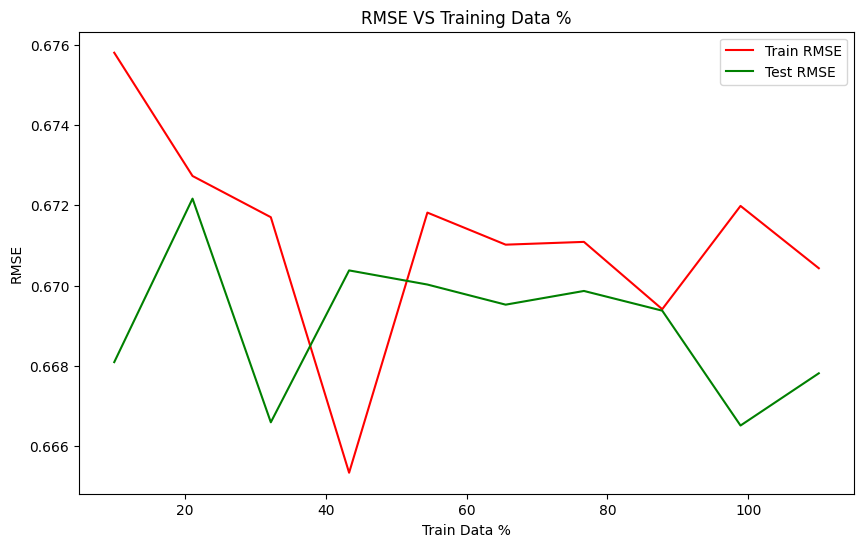

In [23]:
trainDataFraction = np.linspace(10, 110, 10)
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(trainDataFraction, training_rmse, label='Train RMSE', color='red')
plt.plot(trainDataFraction, test_rmse, label='Test RMSE', color='green')

# plt.fill_between(dates[window_size - 1:], upper_band, lower_band, color='lightgray', alpha=0.4, label='Bollinger Bands')
plt.title('RMSE VS Training Data %')
plt.xlabel('Train Data %')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [26]:
# Implementing the model:
# Training with full datasetand best model parameters
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21)

print("X shape: ", X.shape)
print("y shape: ", y.shape)

model = RandomForestClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=9)

model.fit(X_train, y_train)
y_pred =  model.predict(X_test) 

accuracy = acc = accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)

f1_weighted = f1_score(y_test, y_pred, average='weighted')
print("F1 Score (Weighted):", f1_weighted)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print("Confusion matrix:\n",cm)

X shape:  (466739, 6)
y shape:  (466739,)
Accuracy: 0.8211566753795833
F1 Score (Weighted): 0.8195009570018597
Confusion matrix:
 [[37295     0   449]
 [    0 27129 12346]
 [12247     0 50556]]


In [27]:
y_test2 = label_binarize(y_test, classes=[0, 1, 2])
y_score = model.predict_proba(X_test)

roc_auc = roc_auc_score(y_test2, y_score, multi_class='ovr', average='weighted')
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9469584902643173


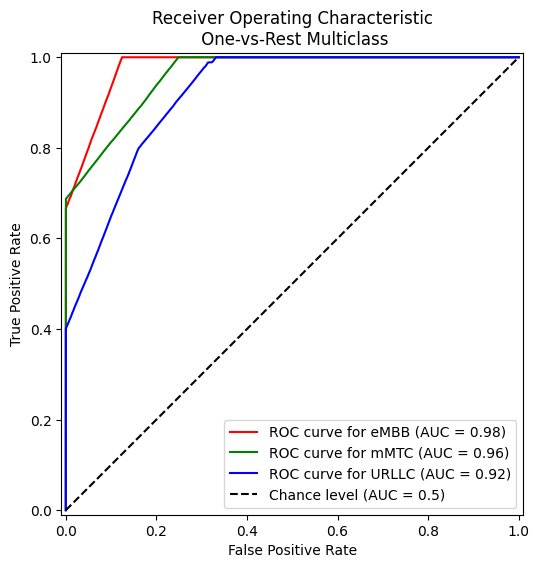

In [28]:
# Plotting ROC Curve (One to Rest)
from sklearn.preprocessing import LabelBinarizer
from itertools import cycle
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

n_classes = 3
fig, ax = plt.subplots(figsize=(6, 6))

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)

"""
eMBB - 0
mMTC - 1
URLLC - 2
"""
colors = cycle(["red", "green", "blue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {labels[class_id]}",
        color=color,
        ax=ax,
        plot_chance_level=(class_id == 2),
    )

_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Receiver Operating Characteristic\n One-vs-Rest Multiclass",
)